In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

d = { "none" : 1,
"del_h1" : 2,
"del_h2" : 3,
"del_hom" : 4,
"dup_h1" : 5,
"dup_h2" : 6,
"dup_hom" : 7,
"inv_h1" : 8,
"inv_h2" : 9,
"inv_hom" : 10,
"idup_h1" : 11,
"idup_h2" : 12,
"complex" : 13}

colors = {"none" : "#F8F8F8",
"del_h1" : "#77AADD",
"del_h2" : "#4477AA",
"del_hom" : "#114477",
"dup_h1" : "#CC99BB",
"dup_h2" : "#AA4488",
"dup_hom" : "#771155",
"inv_h1" : "#DDDD77",
"inv_h2" : "#AAAA44",
"inv_hom" : "#777711",
"idup_h1" : "#DDAA77",
"idup_h2" : "#AA7744",
"complex" : "#774411"}

df = pd.read_csv("../stringent_filterTRUE.tsv", sep="\t")
df["ID"] = df["chrom"] + "_" + df["start"].astype(str) + "_" + df["end"].astype(str)


binbed = pd.read_csv("../bin_200kb_all.bed", sep="\t", names=["chrom", "start", "end", "bin_id"])
binbed["ID"] = binbed["chrom"] + "_" + binbed["start"].astype(str) + "_" + binbed["end"].astype(str)
binbed["chrom"] = pd.Categorical(binbed["chrom"], categories=["chr{}".format(e) for e in range(1,23)] + ["chrX", "chrY"], ordered=True)
binbed = binbed.sort_values(by=["chrom", "start", "end"]).reset_index(drop=True)
binbed = binbed.loc[~binbed["chrom"].isin(["chrY"])]


l = list()

def process_row(r):
    # print(r["cell"])
    tmp_r = binbed.loc[(binbed["chrom"] == r["chrom"]) & (binbed["start"] >= r["start"]) & (binbed["end"] <= r["end"])]
    tmp_r["cell"] = r["cell"]
    tmp_r["sv_call_name"] = r["sv_call_name"]
    tmp_r["af"] = r["af"]
    tmp_r["llr_to_ref"] = r["llr_to_ref"]
    # print(tmp_r)
    l.append(tmp_r)

def process_sv(tmp_df):
    tmp_df.apply(lambda r: process_row(r), axis=1)
    # print(tmp_df)
    # exit()


df.groupby("cell").apply(lambda r: process_sv(r))
# print(l)
processed_df = pd.concat(l)
processed_df["ID"] = processed_df["chrom"].astype(str) + "_" + processed_df["start"].astype(str) + "_" + processed_df["end"].astype(str)


binbed_not_used = binbed.loc[~binbed["ID"].isin(processed_df.ID.unique().tolist())]
concat_df = pd.concat([processed_df, binbed_not_used])

concat_df.loc[concat_df["llr_to_ref"] == np.inf, "llr_to_ref"] = concat_df.loc[concat_df["llr_to_ref"] != np.inf]["llr_to_ref"].max()

pivot_concat_df = concat_df.pivot(index="ID", values="llr_to_ref", columns="cell")
tmp = pivot_concat_df.reset_index().ID.str.split("_", expand=True)
tmp.columns = ["chrom", "start", "end"]
tmp["start"] = tmp["start"].astype(int)
tmp["end"] = tmp["end"].astype(int)

pivot_concat_df = pd.concat([pivot_concat_df.reset_index(), tmp], axis=1).drop(pivot_concat_df.columns[0], axis=1).sort_values(by=["chrom", "start", "end"]).reset_index(drop=True)
pivot_concat_df

,ID,BM510x3PE20401,BM510x3PE20402,BM510x3PE20403,BM510x3PE20406,BM510x3PE20407,BM510x3PE20408,BM510x3PE20410,BM510x3PE20411,BM510x3PE20414,...,RPE1WTPE20489,RPE1WTPE20490,RPE1WTPE20491,RPE1WTPE20492,RPE1WTPE20493,RPE1WTPE20494,RPE1WTPE20495,chrom,start,end
0,chr1_0_200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr1,0,200000
1,chr1_200000_400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr1,200000,400000
2,chr1_400000_600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr1,400000,600000
3,chr1_600000_800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr1,600000,800000
4,chr1_800000_1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr1,800000,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,chrX_155200000_155400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chrX,155200000,155400000
15162,chrX_155400000_155600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chrX,155400000,155600000
15163,chrX_155600000_155800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chrX,155600000,155800000
15164,chrX_155800000_156000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chrX,155800000,156000000


In [2]:
clustering_index_df = pd.read_csv("test.tsv", sep="\t")
clustering_index_df

,index,row_order,cell
0,1,10,BM510x3PE20415
1,2,18,BM510x3PE20424
2,3,3,BM510x3PE20403
3,4,9,BM510x3PE20414
4,5,8,BM510x3PE20411
...,...,...,...
95,96,26,RPE1WTPE20406
96,97,29,RPE1WTPE20410
97,98,87,RPE1WTPE20478
98,99,31,RPE1WTPE20412


chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX


Text(0.5, 0.92, 'TEST')

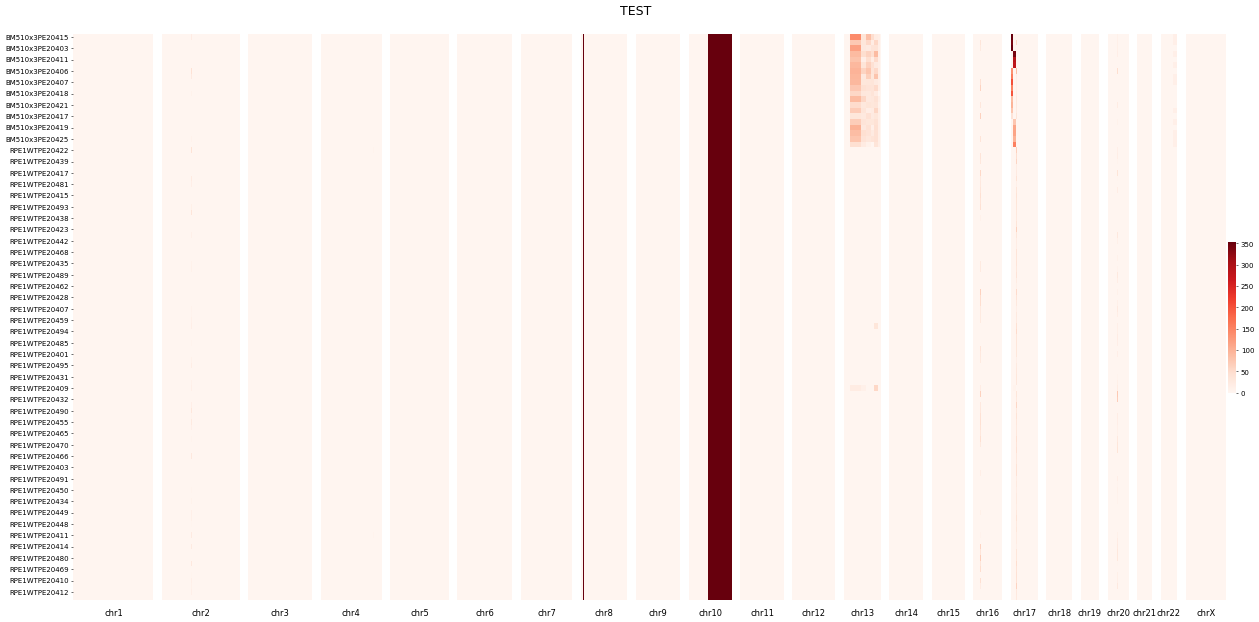

In [13]:
concat_df["sv_call_name_map"] = concat_df["sv_call_name"].map(d)
pivot_concat_df = concat_df.pivot(index="ID", values="llr_to_ref", columns="cell")
tmp = pivot_concat_df.reset_index().ID.str.split("_", expand=True)
tmp.columns = ["chrom", "start", "end"]
tmp["start"] = tmp["start"].astype(int)
tmp["end"] = tmp["end"].astype(int)
pivot_concat_df = pd.concat([pivot_concat_df.reset_index(), tmp], axis=1).drop(pivot_concat_df.columns[0], axis=1)

pivot_concat_df["chrom"] = pd.Categorical(pivot_concat_df["chrom"], categories=["chr{}".format(e) for e in range(1,23)] + ["chrX"], ordered=True)
pivot_concat_df = pivot_concat_df.sort_values(by=["chrom", "start", "end"]).reset_index(drop=True)
# pivot_concat_df

chroms = ["chr{}".format(e) for e in range(1,23)] + ["chrX"]
# chroms = chroms[:2]
# chroms = ["chr10", "chr13", "chr22"]
widths = binbed.loc[binbed["chrom"].isin(chroms)].groupby("chrom")["end"].max().dropna().tolist()
f, axs = plt.subplots(ncols=len(chroms), figsize=(30,15), dpi=50, gridspec_kw={'width_ratios': widths})
for j, (chrom, ax) in enumerate(zip(chroms, axs)):
    print(chrom)
    cbar = False
    if j != 0:
        ax.get_yaxis().set_visible(False)
        ax.yaxis.set_ticks_position('none')    

    if j == len(chroms)-1:
        cbar = True
    data_heatmap = pivot_concat_df.loc[pivot_concat_df["chrom"] == chrom].drop(["chrom", "start", "end"], axis=1).set_index("ID").T.fillna(0)
    data_heatmap = data_heatmap.loc[clustering_index_df.cell.values.tolist()]
    sns.heatmap(
        data=data_heatmap, 
        ax=ax, vmin=0, vmax=concat_df.llr_to_ref.max(), cmap="Reds", cbar=cbar)
    ax.xaxis.set_ticks_position('none')
    ax.set_xlabel("{}".format(chrom), fontsize=12, rotation=90)
    ax.set_xticklabels([])
plt.suptitle("TEST", y=0.92, fontsize=18)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX


Text(0.4, 1.02, 'TEST')

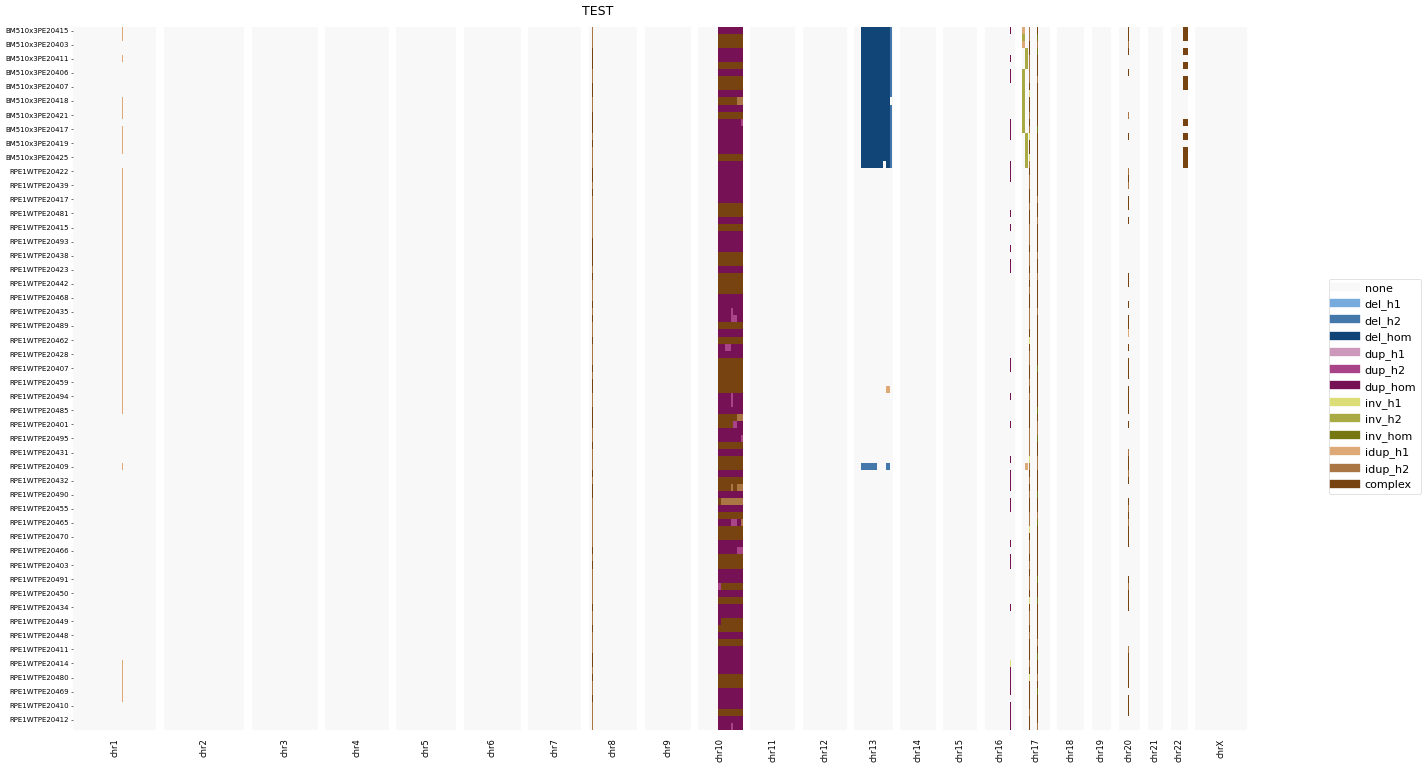

In [12]:
concat_df["sv_call_name_map"] = concat_df["sv_call_name"].map(d)
pivot_concat_df = concat_df.pivot(index="ID", values="sv_call_name_map", columns="cell")
tmp = pivot_concat_df.reset_index().ID.str.split("_", expand=True)
tmp.columns = ["chrom", "start", "end"]
tmp["start"] = tmp["start"].astype(int)
tmp["end"] = tmp["end"].astype(int)
pivot_concat_df = pd.concat([pivot_concat_df.reset_index(), tmp], axis=1).drop(pivot_concat_df.columns[0], axis=1)

pivot_concat_df["chrom"] = pd.Categorical(pivot_concat_df["chrom"], categories=["chr{}".format(e) for e in range(1,23)] + ["chrX"], ordered=True)
pivot_concat_df = pivot_concat_df.sort_values(by=["chrom", "start", "end"]).reset_index(drop=True)


chroms = ["chr{}".format(e) for e in range(1,23)] + ["chrX"]
# chroms = ["chr10", "chr13", "chr22"]
# chroms = chroms[:2]

widths = binbed.loc[binbed["chrom"].isin(chroms)].groupby("chrom")["end"].max().dropna().tolist()

f, axs = plt.subplots(ncols=len(chroms), figsize=(30,15), dpi=50,  gridspec_kw={'width_ratios': widths})

for j, (chrom, ax) in enumerate(zip(chroms, axs)):
    print(chrom)
    data_heatmap = pivot_concat_df.loc[pivot_concat_df["chrom"] == chrom].drop(["chrom", "start", "end"], axis=1).set_index("ID").T.fillna(0)
    data_heatmap = data_heatmap.loc[clustering_index_df.cell.values.tolist()]
    sns.heatmap(data=data_heatmap, 
    ax=ax, vmin=0, cbar=False, cmap=list(colors.values()))
    ax.xaxis.set_ticks_position('none')

    if j != 0:
        ax.get_yaxis().set_visible(False)        
        ax.yaxis.set_ticks_position('none')    

    ax.set_xlabel("{}".format(chrom), fontsize=12, rotation=90)
    ax.set_xticklabels([])

custom_lines = [
    Line2D([0], [0], color=v, lw=12) for j, (k, v) in enumerate(colors.items())
                ]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
axs[-1].legend(custom_lines, list(colors.keys()), bbox_to_anchor=(1 + 0.15*len(chroms), 0.65), fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.suptitle("TEST", x=0.4, y=1.02, fontsize=18)